In [1]:
#importing necessary libraries
import pandas as ps
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir("/content/drive/MyDrive/BRAIN TUMOR/Training")

['pituitary', 'glioma', 'notumor', 'meningioma']

In [3]:
os.listdir("/content/drive/MyDrive/BRAIN TUMOR/Testing")

['pituitary', 'glioma', 'meningioma', 'notumor']

In [4]:
datatrain="/content/drive/MyDrive/BRAIN TUMOR/Training"
X_train=[]
y_train=[]
categories=['pituitary', 'glioma', 'meningioma', 'notumor']

In [5]:
for i in categories:
  print("loading categories............",i)
  path=os.path.join(datatrain,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    # print(imgpath)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print("loaded categories",i)

loading categories............ pituitary
loaded categories pituitary
loading categories............ glioma
loaded categories glioma
loading categories............ meningioma
loaded categories meningioma
loading categories............ notumor
loaded categories notumor


In [6]:
datatest="/content/drive/MyDrive/BRAIN TUMOR/Testing"
X_test=[]
y_test=[]
categories=['pituitary', 'glioma', 'meningioma', 'notumor']

In [7]:
for i in categories:
  print("loading categories............",i)
  path=os.path.join(datatest,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    imgarray=imread(imgpath)
    imgresized=resize(imgarray,(150,150,1))
    X_test.append(imgresized)
    y_test.append(categories.index(i))
  print("loaded categories",i)

loading categories............ pituitary
loaded categories pituitary
loading categories............ glioma
loaded categories glioma
loading categories............ meningioma
loaded categories meningioma
loading categories............ notumor
loaded categories notumor


In [8]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [9]:
X_train.shape

(5538, 150, 150, 1)

In [10]:
X_test.shape

(1315, 150, 150, 1)

In [11]:
y_train.shape

(5538,)

In [12]:
y_test.shape

(1315,)

In [16]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the Keras model
def create_model(optimizer='adam'):
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=(150, 150, 1), activation='relu'),
        MaxPool2D(2, 2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)

# Define the hyperparameters grid
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

# Instantiate GridSearchCV with the KerasClassifier instance
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')

# Fit the grid search
grid_result = grid.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 14s 18ms/step - loss: 0.7097 - accuracy: 0.7568
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.2262 - accuracy: 0.9166
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0875 - accuracy: 0.9737
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0432 - accuracy: 0.9889
Epoch 5/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0154 - accuracy: 0.9978
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.9986
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0427 - accuracy: 0.9875
Epoch 9/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 10ms/step - loss: 0.7013 - accuracy: 0.7551
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.2383 - accuracy: 0.9101
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.1027 - accuracy: 0.9626
Epoch 4/10
370/370 [==============================] - 5s 14ms/step - loss: 0.0680 - accuracy: 0.9778
Epoch 5/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0376 - accuracy: 0.9884
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0199 - accuracy: 0.9930
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0388 - accuracy: 0.9856
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0284 - accuracy: 0.9900
Epoch 9/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0111 - accuracy: 0.9976
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 11ms/step - loss: 0.5506 - accuracy: 0.7971
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.1440 - accuracy: 0.9496
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0546 - accuracy: 0.9848
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 5/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0252 - accuracy: 0.9935
Epoch 6/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0193 - accuracy: 0.9949
Epoch 7/10
370/370 [==============================] - 4s 12ms/step - loss: 0.0037 - accuracy: 0.9997
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 6.0611e-04 - accuracy: 1.0000
Epoch 9/10
370/370 [==============================] - 4s 11ms/step - loss: 2.0377e-04 - accuracy: 1.0000
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 10ms/step - loss: 0.6794 - accuracy: 0.7486
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.2258 - accuracy: 0.9220
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.1043 - accuracy: 0.9697
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0436 - accuracy: 0.9900
Epoch 5/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0180 - accuracy: 0.9965
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 7.8216e-04 - accuracy: 1.0000
Epoch 9/10
370/370 [==============================] - 4s 10ms/step - loss: 5.2625e-04 - accuracy: 1.0000
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 11ms/step - loss: 0.6021 - accuracy: 0.7671
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.2073 - accuracy: 0.9233
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0856 - accuracy: 0.9729
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0447 - accuracy: 0.9881
Epoch 5/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0487 - accuracy: 0.9848
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0169 - accuracy: 0.9962
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 8/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0220 - accuracy: 0.9938
Epoch 9/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0573 - accuracy: 0.9840
Epoch 10/10
185/185 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 10ms/step - loss: 0.6251 - accuracy: 0.7738
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.1969 - accuracy: 0.9288
Epoch 3/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0754 - accuracy: 0.9740
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0306 - accuracy: 0.9913
Epoch 5/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0146 - accuracy: 0.9962
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0039 - accuracy: 0.9995
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 8.4548e-04 - accuracy: 1.0000
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 4.7199e-04 - accuracy: 1.0000
Epoch 9/10
370/370 [==============================] - 4s 12ms/step - loss: 3.3060e-04 - accuracy: 1.0000
Epoch 10/10
185/185 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 10ms/step - loss: 0.6674 - accuracy: 0.7660
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.2094 - accuracy: 0.9274
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0680 - accuracy: 0.9824
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0310 - accuracy: 0.9916
Epoch 5/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0135 - accuracy: 0.9962
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0159 - accuracy: 0.9967
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0051 - accuracy: 0.9989
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 8.3572e-04 - accuracy: 1.0000
Epoch 9/10
370/370 [==============================] - 4s 10ms/step - loss: 3.0716e-04 - accuracy: 1.0000
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 5s 11ms/step - loss: 0.6671 - accuracy: 0.7660
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.2405 - accuracy: 0.9136
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.1177 - accuracy: 0.9605
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0523 - accuracy: 0.9859
Epoch 5/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0292 - accuracy: 0.9927
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0123 - accuracy: 0.9976
Epoch 7/10
370/370 [==============================] - 3s 9ms/step - loss: 0.0060 - accuracy: 0.9997
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
370/370 [==============================] - 4s 9ms/step - loss: 7.7737e-04 - accuracy: 1.0000
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
370/370 [==============================] - 4s 10ms/step - loss: 0.6467 - accuracy: 0.7839
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.1851 - accuracy: 0.9361
Epoch 3/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0567 - accuracy: 0.9832
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0168 - accuracy: 0.9965
Epoch 5/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0060 - accuracy: 0.9995
Epoch 6/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 7/10
370/370 [==============================] - 4s 10ms/step - loss: 6.4820e-04 - accuracy: 1.0000
Epoch 8/10
370/370 [==============================] - 4s 10ms/step - loss: 4.0389e-04 - accuracy: 1.0000
Epoch 9/10
370/370 [==============================] - 4s 10ms/step - loss: 2.9737e-04 - accuracy: 1.0000
Epoch 10/10
185/185 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
554/554 [==============================] - 7s 10ms/step - loss: 0.5626 - accuracy: 0.8012
Epoch 2/10
554/554 [==============================] - 5s 9ms/step - loss: 0.1866 - accuracy: 0.9323
Epoch 3/10
554/554 [==============================] - 5s 10ms/step - loss: 0.0780 - accuracy: 0.9747
Epoch 4/10
554/554 [==============================] - 5s 10ms/step - loss: 0.0365 - accuracy: 0.9897
Epoch 5/10
554/554 [==============================] - 5s 9ms/step - loss: 0.0265 - accuracy: 0.9937
Epoch 6/10
554/554 [==============================] - 6s 10ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 7/10
554/554 [==============================] - 5s 9ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 8/10
554/554 [==============================] - 6s 10ms/step - loss: 0.0254 - accuracy: 0.9924
Epoch 9/10
554/554 [==============================] - 5s 9ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 10/10
554/554 [==============================] - 5s 10ms/step - loss: 0.0175 - accuracy: 

In [15]:
!pip install scikeras


In [17]:
# Access best model parameters
best_params = grid_result.best_params_
print(best_params)

# Use best parameters to create the final model
final_model = create_model(optimizer=best_params['optimizer'])

# Fit the final model
final_model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1)



{'optimizer': 'sgd'}
Epoch 1/10
554/554 [==============================] - 5s 9ms/step - loss: 0.8073 - accuracy: 0.6609
Epoch 2/10
554/554 [==============================] - 4s 8ms/step - loss: 0.5033 - accuracy: 0.8050
Epoch 3/10
554/554 [==============================] - 4s 8ms/step - loss: 0.3857 - accuracy: 0.8536
Epoch 4/10
554/554 [==============================] - 5s 8ms/step - loss: 0.3059 - accuracy: 0.8868
Epoch 5/10
554/554 [==============================] - 4s 8ms/step - loss: 0.2414 - accuracy: 0.9137
Epoch 6/10
554/554 [==============================] - 4s 8ms/step - loss: 0.1948 - accuracy: 0.9270
Epoch 7/10
554/554 [==============================] - 5s 8ms/step - loss: 0.1461 - accuracy: 0.9502
Epoch 8/10
554/554 [==============================] - 4s 8ms/step - loss: 0.1187 - accuracy: 0.9599
Epoch 9/10
554/554 [==============================] - 4s 8ms/step - loss: 0.0877 - accuracy: 0.9727
Epoch 10/10
554/554 [==============================] - 5s 8ms/step - loss: 0.07

In [18]:
# Evaluate the final model
loss, accuracy = final_model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

42/42 [==============================] - 0s 6ms/step - loss: 0.2115 - accuracy: 0.9308
Loss: 0.21151691675186157
Accuracy: 0.9307984709739685


TRANSFER LEARNING


In [19]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_path="/content/drive/MyDrive/BRAIN TUMOR/Testing"
test_path="/content/drive/MyDrive/BRAIN TUMOR/Testing"

In [45]:
I_SIZE = [224, 224]
vgg = VGG16(input_shape=I_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)  # Use 4 units for 4 classes
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

training_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=10, class_mode='sparse')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=10, class_mode='sparse')

r = model.fit_generator(training_set, validation_data=test_set, epochs=5)

Found 1315 images belonging to 4 classes.
Found 1315 images belonging to 4 classes.


<ipython-input-45-63ef4081132f>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set, validation_data=test_set, epochs=5)


Epoch 1/5
132/132 [==============================] - 33s 227ms/step - loss: 1.0722 - accuracy: 0.6563 - val_loss: 0.3415 - val_accuracy: 0.8745
Epoch 2/5
132/132 [==============================] - 33s 252ms/step - loss: 0.5519 - accuracy: 0.8023 - val_loss: 0.3052 - val_accuracy: 0.8867
Epoch 3/5
132/132 [==============================] - 33s 252ms/step - loss: 0.4862 - accuracy: 0.8312 - val_loss: 0.2565 - val_accuracy: 0.9065
Epoch 4/5
132/132 [==============================] - 30s 227ms/step - loss: 0.3830 - accuracy: 0.8563 - val_loss: 0.1970 - val_accuracy: 0.9255
Epoch 5/5
132/132 [==============================] - 29s 223ms/step - loss: 0.4229 - accuracy: 0.8532 - val_loss: 0.1638 - val_accuracy: 0.9414


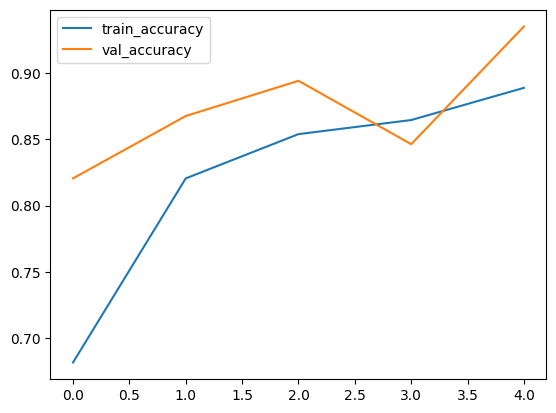

In [26]:
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


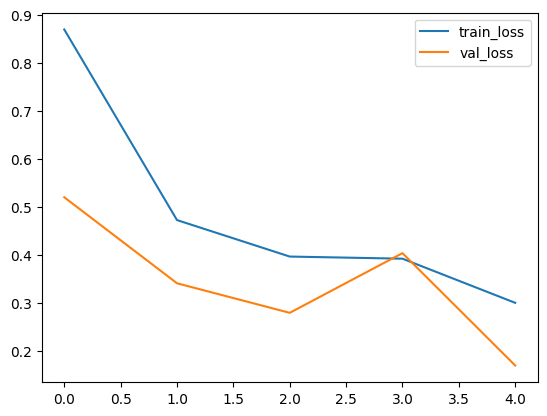

In [22]:

plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [60]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def predict_new(imgpath,model):
  image=cv2.imread(imgpath)
  cv2_imshow(image)
  img_resized=cv2.resize(image,(224,224))
  print(img_resized.shape)
  image=img_resized.reshape(1,224,224,3)
  print(image.shape)
  pred=model.predict(image)
  x=np.argmax(pred)
  if x==0:
    print("pituitary")
  elif x==1:
    print("glioma")
  elif x==2:
    print("meningioma")
  else:
    print("notumor")
  print(pred)

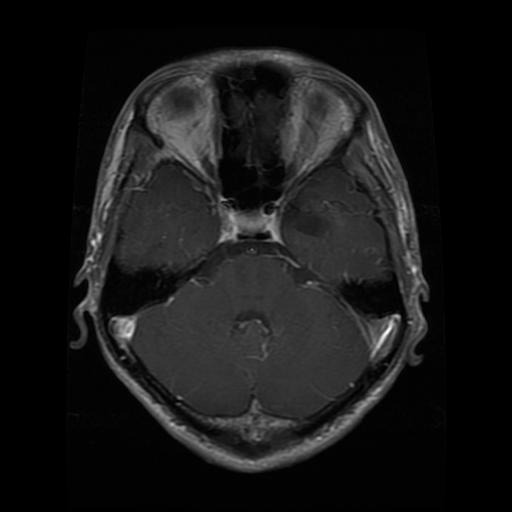

(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
glioma
[[0.0000000e+00 9.9999726e-01 2.6838370e-06 0.0000000e+00]]


In [61]:
path="/content/drive/MyDrive/BRAIN TUMOR/Testing/glioma/Te-glTr_0001.jpg"
predict_new(path,model)

